In [1]:
import numpy as np

In [50]:
# Percetron
class Percetron(object):
    def __init__(self, Learning_Rate = 0.001, n_Iteration = 500):
        self.Learning_Rate = Learning_Rate
        self.n_Iteration = n_Iteration
    
    def train(self, X, Y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        self.error_ = []
        
        for _ in range(self.n_Iteration):
            error = 0
            for x,y in zip(X,Y):
                if not self.AND(self.linreg(x), y):
                    self.w += self.Learning_Rate*y*x
                    self.b += self.Learning_Rate*y
                    error += 1
            self.error_.append(error)
            if error == 0:
                break
        return self
    
    def AND(self, o, y):
        if y*o<=0:
            return 0
        else:
            return 1
    
    def linreg(self, x):
        return(np.dot(x,self.w)+self.b)

In [51]:
# A simple case
X = np.array([[1,1],
             [1,-3],
             [-1,-1],
             [-1,-3]])
Y = np.array([1,1,-1,-1])

In [52]:
pn = Percetron(Learning_Rate = 0.5, n_Iteration = 50)

In [53]:
result = pn.train(X,Y) 

In [54]:
result.w,result.error_,result.b

(array([ 2.5, -0.5]), [4, 1, 0], 0.5)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

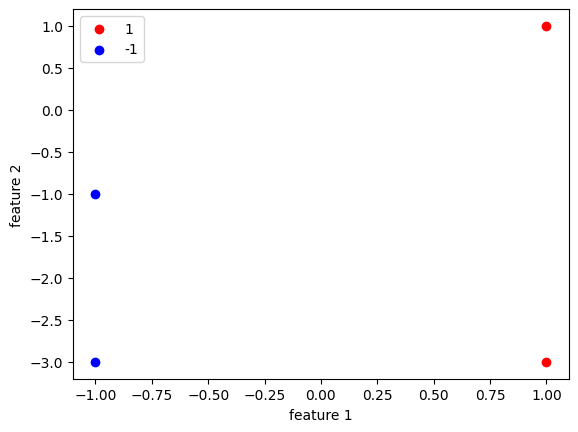

In [56]:
# make a plot
plt.scatter(X[:2,0],X[:2,1],color='red',label='1')
plt.scatter(X[2:4,0],X[2:4,1],color='blue',label='-1')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='upper left')
plt.show()

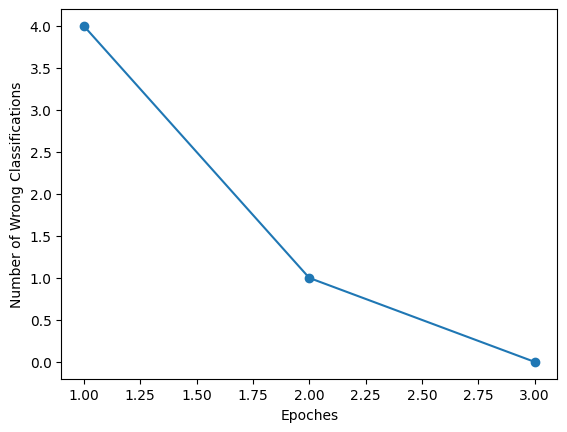

In [58]:
plt.plot(range(1, len(result.error_)+1), result.error_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of Wrong Classifications')
plt.show()

In [61]:
def plot_decision_region(X, y, classifier, resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
     
    #plot the desicion surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1  
    # x3_min,x3_max=X[:,2].min()-1,X[:,2].max()+1
     
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
    Z = np.where(classifier.linreg(np.array([xx1.ravel(),xx2.ravel()],).T) >= 0, 1, -1)
    Z=Z.reshape(xx1.shape)
     
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
     
    #绘画样本点
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx), marker=markers[idx],label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


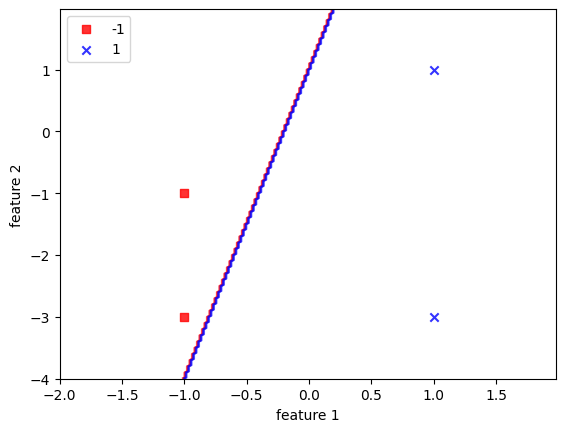

In [64]:
plot_decision_region(X,Y,classifier=result)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='upper left')
plt.show()